# SlashMark Internship Task 1
## Analyze Daily Weather Data

**Problem Statement:** Use a small dataset of daily weather information (temperature, precipitation, etc.) and Analyze Weather on Daily basis.

## Data Exploration

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
df=pd.read_csv("weather.csv")

In [4]:
print(df)

     MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0        8.0     24.3       0.0          3.4       6.3          NW   
1       14.0     26.9       3.6          4.4       9.7         ENE   
2       13.7     23.4       3.6          5.8       3.3          NW   
3       13.3     15.5      39.8          7.2       9.1          NW   
4        7.6     16.1       2.8          5.6      10.6         SSE   
..       ...      ...       ...          ...       ...         ...   
361      9.0     30.7       0.0          7.6      12.1         NNW   
362      7.1     28.4       0.0         11.6      12.7           N   
363     12.5     19.9       0.0          8.4       5.3         ESE   
364     12.5     26.9       0.0          5.0       7.1          NW   
365     12.3     30.2       0.0          6.0      12.6          NW   

     WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  ...  Humidity3pm  \
0             30.0         SW         NW           6.0  ...           29   
1      

In [5]:
df.head(10)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No
5,6.2,16.9,0.0,5.8,8.2,SE,44.0,SE,E,20.0,...,57,1023.8,1021.7,7,5,10.9,14.8,No,0.2,No
6,6.1,18.2,0.2,4.2,8.4,SE,43.0,SE,ESE,19.0,...,47,1024.6,1022.2,4,6,12.4,17.3,No,0.0,No
7,8.3,17.0,0.0,5.6,4.6,E,41.0,SE,E,11.0,...,57,1026.2,1024.2,6,7,12.1,15.5,No,0.0,No
8,8.8,19.5,0.0,4.0,4.1,S,48.0,E,ENE,19.0,...,48,1026.1,1022.7,7,7,14.1,18.9,No,16.2,Yes
9,8.4,22.8,16.2,5.4,7.7,E,31.0,S,ESE,7.0,...,32,1024.1,1020.7,7,1,13.3,21.7,Yes,0.0,No


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        366 non-null    float64
 1   MaxTemp        366 non-null    float64
 2   Rainfall       366 non-null    float64
 3   Evaporation    366 non-null    float64
 4   Sunshine       363 non-null    float64
 5   WindGustDir    363 non-null    object 
 6   WindGustSpeed  364 non-null    float64
 7   WindDir9am     335 non-null    object 
 8   WindDir3pm     365 non-null    object 
 9   WindSpeed9am   359 non-null    float64
 10  WindSpeed3pm   366 non-null    int64  
 11  Humidity9am    366 non-null    int64  
 12  Humidity3pm    366 non-null    int64  
 13  Pressure9am    366 non-null    float64
 14  Pressure3pm    366 non-null    float64
 15  Cloud9am       366 non-null    int64  
 16  Cloud3pm       366 non-null    int64  
 17  Temp9am        366 non-null    float64
 18  Temp3pm   

In [7]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,366.000000,366.000000,366.000000,366.000000,363.000000,364.000000,359.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,7.265574,20.550273,1.428415,4.521858,7.909366,39.840659,9.651811,17.986339,72.035519,44.519126,1019.709016,1016.810383,3.890710,4.024590,12.358470,19.230874,1.428415
std,6.025800,6.690516,4.225800,2.669383,3.481517,13.059807,7.951929,8.856997,13.137058,16.850947,6.686212,6.469422,2.956131,2.666268,5.630832,6.640346,4.225800
min,-5.300000,7.600000,0.000000,0.200000,0.000000,13.000000,0.000000,0.000000,36.000000,13.000000,996.500000,996.800000,0.000000,0.000000,0.100000,5.100000,0.000000
25%,2.300000,15.025000,0.000000,2.200000,5.950000,31.000000,6.000000,11.000000,64.000000,32.250000,1015.350000,1012.800000,1.000000,1.000000,7.625000,14.150000,0.000000
50%,7.450000,19.650000,0.000000,4.200000,8.600000,39.000000,7.000000,17.000000,72.000000,43.000000,1020.150000,1017.400000,3.500000,4.000000,12.550000,18.550000,0.000000
75%,12.500000,25.500000,0.200000,6.400000,10.500000,46.000000,13.000000,24.000000,81.000000,55.000000,1024.475000,1021.475000,7.000000,7.000000,17.000000,24.000000,0.200000
max,20.900000,35.800000,39.800000,13.800000,13.600000,98.000000,41.000000,52.000000,99.000000,96.000000,1035.700000,1033.200000,8.000000,8.000000,24.700000,34.500000,39.800000


In [8]:
df.isnull().sum()

MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          3
WindGustDir       3
WindGustSpeed     2
WindDir9am       31
WindDir3pm        1
WindSpeed9am      7
WindSpeed3pm      0
Humidity9am       0
Humidity3pm       0
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
Temp9am           0
Temp3pm           0
RainToday         0
RISK_MM           0
RainTomorrow      0
dtype: int64

# Data Visualization - I

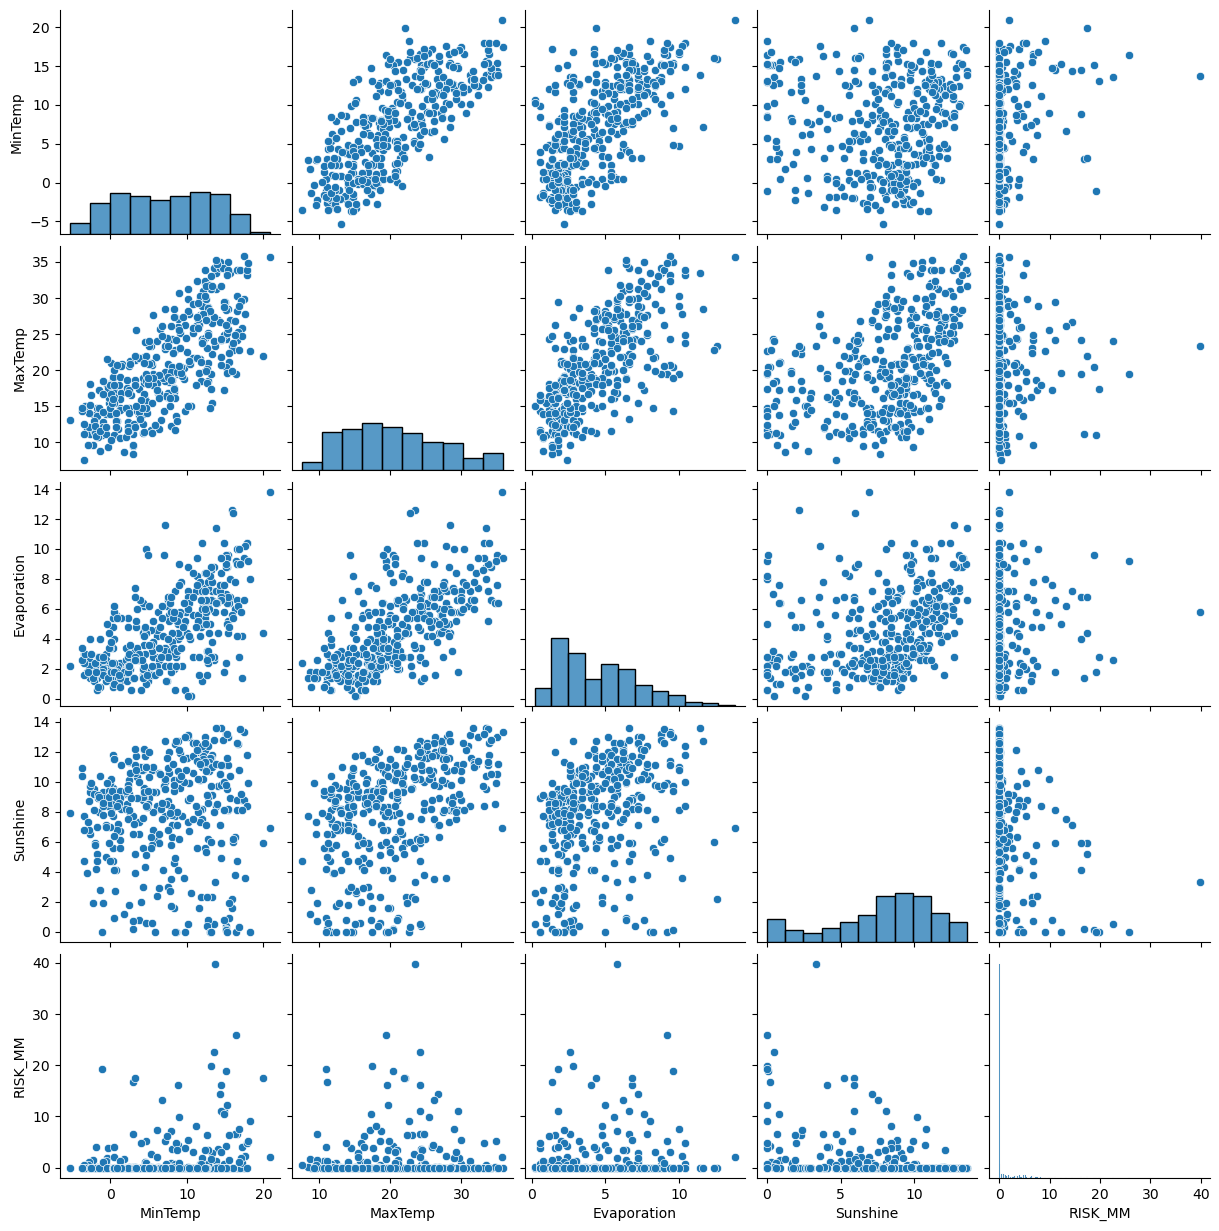

In [9]:
sns.pairplot(df[['MinTemp','MaxTemp','Evaporation','Sunshine','RISK_MM']])
plt.show()

# Data Analysis: Calculate statistics or relationships for MinTemp

In [10]:
print("Mean of MinTemp ",df["MinTemp"].mean())

Mean of MinTemp  7.265573770491804


In [11]:
print("Median of MinTemp ",df["MinTemp"].median())

Median of MinTemp  7.45


In [12]:
print("STD of MinTemp ",df["MinTemp"].std())

STD of MinTemp  6.025799834253392


# Data Analysis: Calculate statistics or relationships for Rainfall

In [13]:
print("Mean of Rainfall ",df["Rainfall"].mean())

Mean of Rainfall  1.428415300546448


In [14]:
print("Median of Rainfall ",df["Rainfall"].median())

Median of Rainfall  0.0


In [15]:
print("STD of Rainfall ",df["Rainfall"].std())

STD of Rainfall  4.225799585804068


# correleation between two columns

In [16]:
df['MinTemp'].corr(df['MaxTemp'])

0.7524707945910016

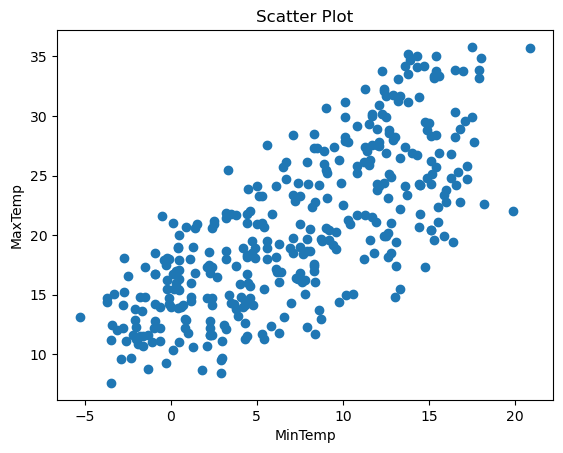

In [17]:
plt.scatter(df['MinTemp'],df['MaxTemp'])
plt.xlabel("MinTemp")
plt.ylabel("MaxTemp")
plt.title("Scatter Plot")
plt.show()

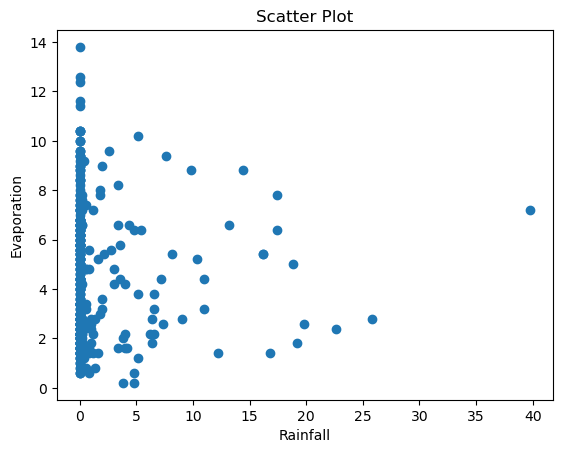

In [18]:
plt.scatter(df["Rainfall"],df["Evaporation"])
plt.xlabel("Rainfall")
plt.ylabel("Evaporation")
plt.title("Scatter Plot")
plt.show()

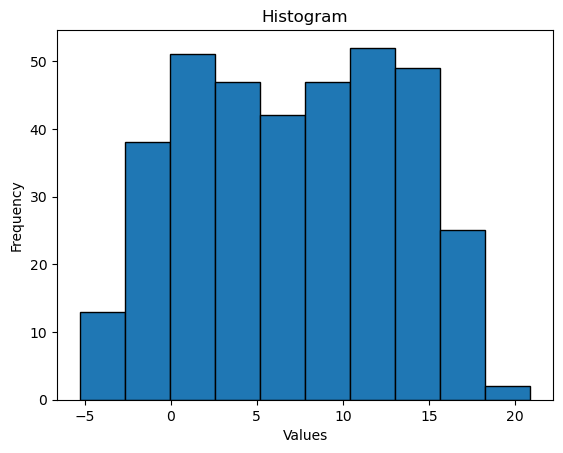

In [19]:
plt.hist(df["MinTemp"], bins=10, edgecolor='black')
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Histogram")
plt.show()

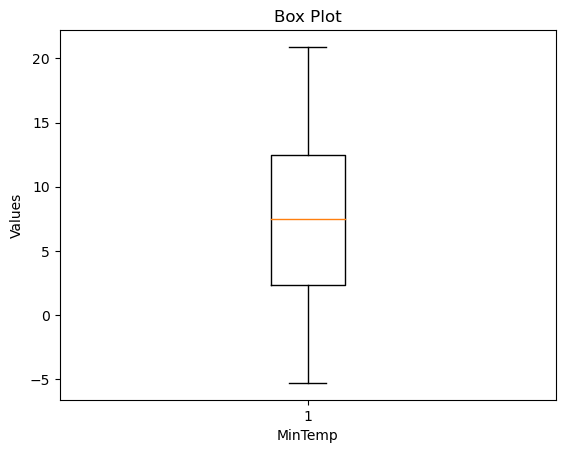

In [20]:
plt.boxplot(df["MinTemp"])
plt.xlabel("MinTemp")
plt.ylabel("Values")
plt.title("Box Plot")
plt.show()

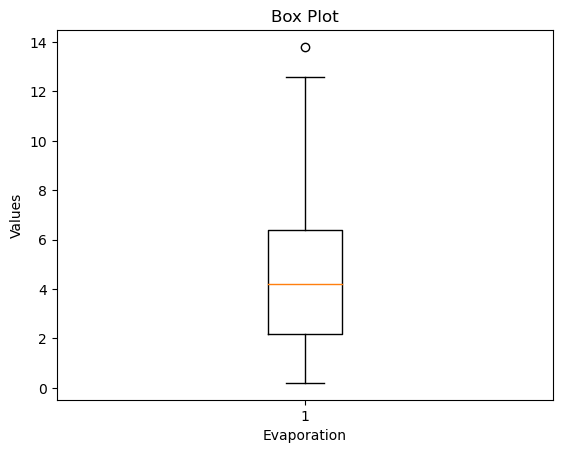

In [21]:
plt.boxplot(df["Evaporation"])
plt.xlabel("Evaporation")
plt.ylabel("Values")
plt.title("Box Plot")
plt.show()

# Prediction

In [22]:
X = df[['MinTemp', 'MaxTemp']]
y = df['Rainfall']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [25]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error for Rainfall Prediction: {mse}')

Mean Squared Error for Rainfall Prediction: 37.0768456005826
